__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

-------------------------------------------       JAWERIA ALTAF (ROll no : 483694)       -------------------------------------------          
__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

LOADING THE DATASET

In [2]:
# Load the dataset
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

DATA PREVIEW

In [3]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,NaN,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


PREPARE DATASET

In [5]:
# Add labels to indicate real and fake news
true_df['label'] = 1
fake_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, fake_df])

In [6]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,NaN,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1


In [7]:
import random

In [8]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
data.head(10)

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,6-Oct-17,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,1-Feb-17,1
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,28-Oct-17,1
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,6-Sep-17,1
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,"Feb 24, 2016",0
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,"Feb 4, 2017",0


EDA

Dataset Info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44895 non-null  object
 1   text     44893 non-null  object
 2   subject  44895 non-null  object
 3   date     44896 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Class Distribution

In [11]:
data['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        1
4        0
        ..
44893    1
44894    0
44895    0
44896    1
44897    1
Name: label, Length: 44898, dtype: int64>

Subject-wise Distribution

In [12]:
data["subject"].value_counts()

subject
politicsNews       11270
worldnews          10144
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

Describe

In [13]:
data.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Check Null values

In [14]:
data.isnull().sum()

title      3
text       5
subject    3
date       2
label      0
dtype: int64

DATA PREPROCESSING

Removing null values

In [15]:
data = data.fillna(" ")

In [16]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

FEATURE EXTRACTION

Checking total no. of columns

In [17]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Droping unnecessary columns

In [18]:
#"title", "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.
df = data.drop(['title', 'subject', 'date'], axis=1)

In [19]:
df.head(10)

,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0
5,WASHINGTON (Reuters) - As a lawyer in private ...,1
6,ADEN (Reuters) - A Salafist imam was shot dead...,1
7,KUALA LUMPUR (Reuters) - Potential witnesses t...,1
8,The goal of socialism is communism. -Vladimi...,0
9,Opposing views and beliefs has much of this co...,0


In [1]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [21]:
port_stem = PorterStemmer()
port_stem

<PorterStemmer>

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jaweria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Preprocess Text Using NLP Techniques

In [23]:
stop_words = set(stopwords.words('english'))

In [24]:
# This function preprocesses text by removing non-alphabetic characters, converting words to lowercase, 
# eliminating stopwords, and applying stemming to normalize the text for machine learning.

def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con1 = con.lower()
    con2 = con1.split()
    con3 = [port_stem.stem(word) for word in con2 if not word in stop_words]
    con4 = ' '.join(con3)
    return con4
    

In [25]:
df.shape

(44898, 2)

Apply function

In [26]:
df['text'] = df['text'].apply(stemming)

In [27]:
df['text'].head(10)

0    donald trump white hous chao tri cover russia ...
1    donald trump presumpt gop nomine time rememb c...
2    mike penc huge homophob support ex gay convers...
3    san francisco reuter california attorney gener...
4    twist reason come pelosi day especi promin dem...
5    washington reuter lawyer privat practic decad ...
6    aden reuter salafist imam shot dead gunmen ear...
7    kuala lumpur reuter potenti wit multi billion ...
8    goal social commun vladimir lenin communistfor...
9    oppos view belief much countri heat feud donal...
Name: text, dtype: object

DATA VISUALIZATION

In [28]:
import seaborn as sns

In [29]:
from collections import Counter

This plot visualizes the distribution of fake and real news, ordered by frequency.

C:\Users\Jaweria\AppData\Local\Temp\ipykernel_16284\2769272054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


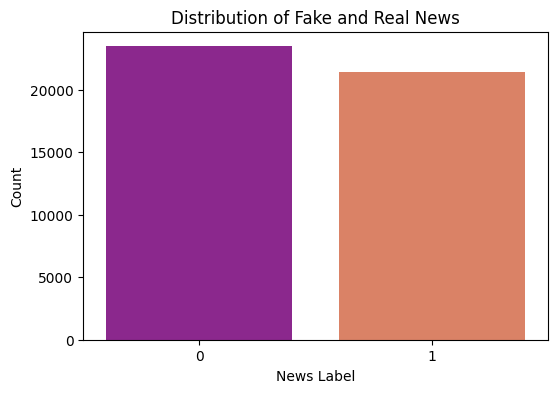

In [30]:
plt.figure(figsize=(6,4))

sns.countplot(
    data=df,
    x='label',
    order=data['label'].value_counts().index , palette='plasma'
)

plt.title('Distribution of Fake and Real News')
plt.xlabel('News Label')
plt.ylabel('Count')
plt.show()


Bargraph of the Top 20 Most Frequent Words.

In [31]:
all_text = ' '.join(df['text'])
words = all_text.split()

In [32]:
top_words = Counter(words).most_common(20)

In [33]:
top_words

[('trump', 134867),
 ('said', 132789),
 ('state', 63395),
 ('presid', 60519),
 ('would', 55164),
 ('u', 54549),
 ('peopl', 42029),
 ('year', 41691),
 ('republican', 39757),
 ('one', 39200),
 ('say', 36924),
 ('elect', 31660),
 ('also', 31368),
 ('new', 31330),
 ('govern', 30904),
 ('like', 30182),
 ('hous', 29705),
 ('time', 29573),
 ('report', 29504),
 ('clinton', 29431)]

In [34]:
word_list, count_list = zip(*top_words) 
# zip(*) separates words and their frequencies into two lists for plotting.

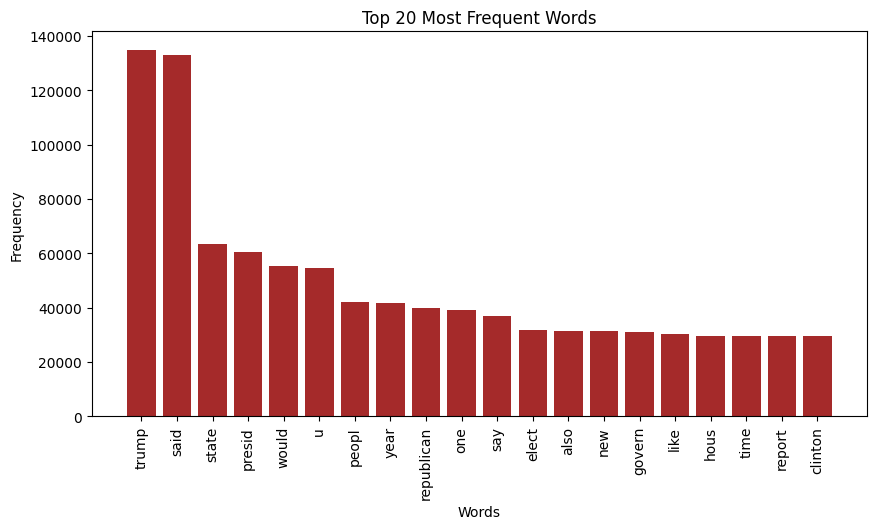

In [35]:
plt.figure(figsize=(10,5))
plt.bar(word_list, count_list, color='Brown')
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

WORD CLOUDS OF MOST FREQUENT WORDS

For Fake News

In [36]:
from wordcloud import WordCloud

In [37]:
from PIL import Image

In [38]:
mask = np.array(Image.open('bird.png'))

In [39]:
fake_text = ' '.join(df[df['label']== 0]['text'])

In [40]:
wc = WordCloud(
    background_color='Black',
    max_words=2000,
    mask=mask,
    colormap='rainbow'   # colors
).generate(fake_text)

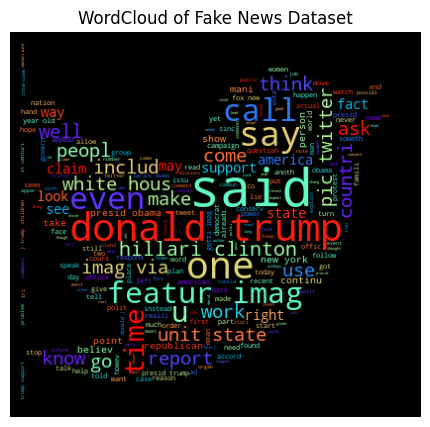

In [41]:
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud of Fake News Dataset')
plt.show()

For True News

In [42]:
mask2 = np.array(Image.open('upvote.png'))
true_text = ' '.join(df[df['label']== 1]['text'])


In [43]:
wc2 = WordCloud(
    background_color='Black',
    max_words=2000,
    mask=mask2,
    colormap='rainbow'   # colors
).generate(true_text)

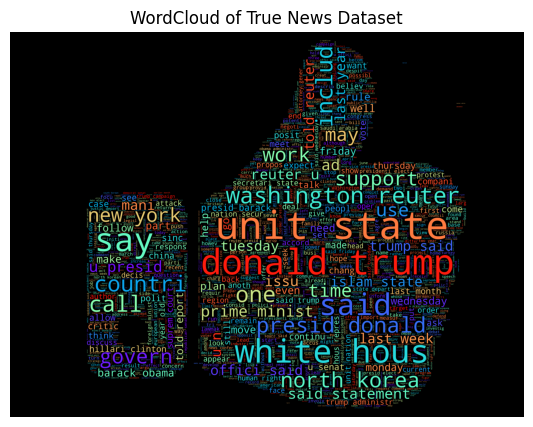

In [44]:
plt.figure(figsize=(10,5))
plt.imshow(wc2)
plt.axis('off')
plt.title('WordCloud of True News Dataset')
plt.show()

TRAINING THE MODEL

Defining dependent and independent variable as x and y

In [45]:
x = df['text']

In [46]:
y = df['label']

In [47]:
x.head()

0    donald trump white hous chao tri cover russia ...
1    donald trump presumpt gop nomine time rememb c...
2    mike penc huge homophob support ex gay convers...
3    san francisco reuter california attorney gener...
4    twist reason come pelosi day especi promin dem...
Name: text, dtype: object

Splitting the dataset into training set and testing set.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

Convert TEXT to VECTORS

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vect = TfidfVectorizer()

In [53]:
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

TRAIN WITH MODEL 1 — MULTINOMIAL NAIVE BAYES

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize and train the Multinomial Naive Bayes model

nb = MultinomialNB()

In [56]:
nb.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [57]:
# Predict on the test data
nb_predict = nb.predict(x_test)

Naive Bayes Model Accuracy:
0.9337416481069042
 
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4773
           1       0.94      0.92      0.93      4207

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

 
Naive Bayes Model Confusion Matrix:


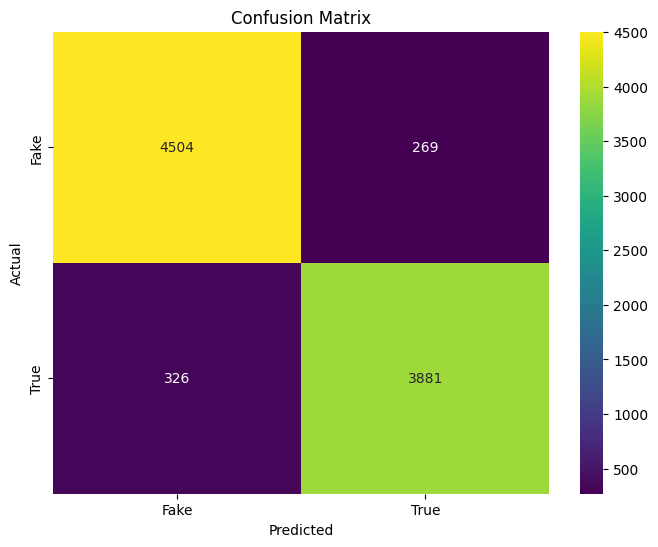

In [70]:
# Evaluate the model

nb_accuracy = accuracy_score(y_test, nb_predict)
nb_report = classification_report(y_test, nb_predict)
nb_matrix = confusion_matrix(y_test, nb_predict)

print("Naive Bayes Model Accuracy:")
print(nb_accuracy)

print(" ")

print("Naive Bayes Model Classification Report:")
print(nb_report)

print(" ")

print("Naive Bayes Model Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TRAIN WITH MODEL 2 — LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize and train the Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [74]:
# Predict on the test data
lr_predict = lr.predict(x_test)

Logistic Regression Model Accuracy:
0.9855233853006682
 
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4773
           1       0.98      0.99      0.98      4207

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

 
Logistic Regression Model Confusion Matrix:


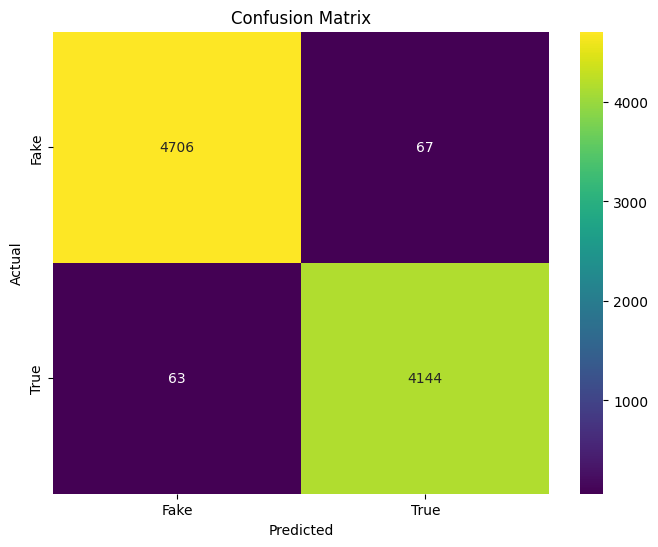

In [75]:
# Evaluate the model

lr_accuracy = accuracy_score(y_test, lr_predict)
lr_report = classification_report(y_test, lr_predict)
lr_matrix = confusion_matrix(y_test, lr_predict)

print("Logistic Regression Model Accuracy:")
print(lr_accuracy)

print(" ")

print("Logistic Regression Model Classification Report:")
print(lr_report)

print(" ")

print("Logistic Regression Model Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TRAIN WITH MODEL 3 — SUPPORT VECTOR MACHINE (SVM)

In [76]:
from sklearn.svm import LinearSVC

In [77]:
# Initialize and train the Support Vector machine (SVM)

svm = LinearSVC()
svm.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [78]:
# Predict on the test data
svm_predict = svm.predict(x_test)

Support Vector machine Model Accuracy:
0.9938752783964365
 
Support Vector machine Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4773
           1       0.99      0.99      0.99      4207

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

 
Support Vector machine Model Confusion Matrix:


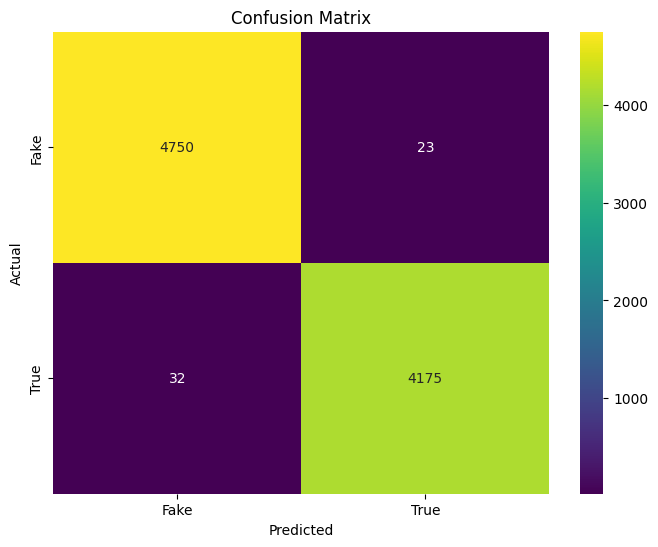

In [79]:
# Evaluate the model

svm_accuracy = accuracy_score(y_test, svm_predict)
svm_report = classification_report(y_test, svm_predict)
svm_matrix = confusion_matrix(y_test, svm_predict)

print("Support Vector machine Model Accuracy:")
print(svm_accuracy)

print(" ")

print("Support Vector machine Model Classification Report:")
print(svm_report)

print(" ")

print("Support Vector machine Model Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-------------------- MODEL COMPARISON --------------------

Through Dataframe

In [80]:
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, nb_predict),
        accuracy_score(y_test, lr_predict),
        accuracy_score(y_test, svm_predict)
    ]
})

results


,Model,Accuracy
0,Naive Bayes,0.933742
1,Logistic Regression,0.985523
2,SVM,0.993875


Through Graph

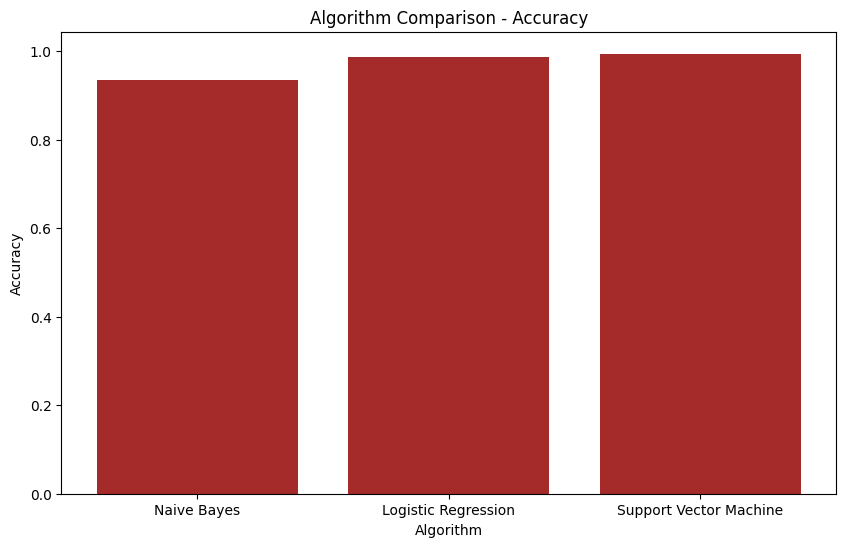

In [ ]:
# Define the algorithm names and their corresponding Accuracy

algorithms = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine']
accuracies = [nb_accuracy, lr_accuracy, svm_accuracy]

# Create a bar chart for accuracy

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='Brown')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy')
plt.show()

Result:
Three machine learning models were trained and evaluated using TF-IDF features. Among them, SVM achieved the highest accuracy, followed by Logistic Regression and Naive Bayes.

Conclusion:
Based on performance comparison, SVM was selected as the final model for fake news detection due to its superior accuracy and balanced classification results.

SAVING THE BEST MODEL

In [84]:
import pickle

In [85]:
pickle.dump(vect, open('vector.pkl', 'wb'))
pickle.dump(svm, open('model.pkl', 'wb'))

In [86]:
vector_form = pickle.load(open('vector.pkl', 'rb'))
load_svm = pickle.load(open('model.pkl','rb'))

In [87]:
def news_detection(news):
    news1 = stemming(news)
    input_data = [news1]
    vectorize = vector_form.transform(input_data)
    prediction = load_svm.predict(vectorize)
    return prediction

In [97]:
val=news_detection("""WARSAW (Reuters) - Poland will not change its stance on the European Union s 
                   posted workers directive, Prime Minister Beata Szydlo said on Thursday.  We are not 
                   going to change our stance,  Szydlo told reporters.  We will defend our position to the 
                   very end, because it is a position that is in the interests of Polish workers.  " \
                   """)


if val==[0]:
    print('Fake News')
else:
    print('True News')

True News
